<a href="https://colab.research.google.com/github/shambhavithakur/marketing-subscription-predictor/blob/main/marketing_subs_model_creation2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting whether or not a customer will purchase a marketing subscription: Model creation with PyCaret [2]

## Introduction

In this notebook, we will train models using selected features from the prepared dataset. To find out how this dataset was prepared, refer to the [exploratory data analysis notebook](https://colab.research.google.com/github/shambhavithakur/marketing-subscription-predictor/blob/main/marketing_subs_eda.ipynb).

We will employ modules from the PyCaret library to train the models.

## Importing the most relevant machine-learning libraries

In [1]:
# Installing PyCaret
!pip install pycaret[full] &> /dev/null

In [2]:
# Enabling Colab mode so that PyCaret can display interactive graphs in this notebook
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [3]:
# Importing pandas and the PyCaret classification module

import pandas as pd
from pycaret import classification as clf 

## Loading the training data set

In [4]:
# Using pandas to load the dataset

import pandas as pd

base_path = '/content/drive/MyDrive/ml/20201015-marketing-subs/'

train = pd.read_feather(base_path + 'train')
test = pd.read_feather(base_path + 'test')

In [5]:
# Creating copies of the train and test data sets with selected features

selected_features = ['age', 'job', 'marital', 'education', 'default', 'housing',\
                     'loan', 'contact', 'day_of_week', 'day_of_week_cos',\
                     'campaign', 'previous', 'poutcome', 'cons_conf_idx',\
                     'euribor3m', 'nr_employed', 'bought']

train_v2 = train[selected_features].copy()
test_v2 = test[selected_features].copy()

In [6]:
train_v2.shape, test_v2.shape

((35511, 17), (3946, 17))

In [7]:
train_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35511 entries, 0 to 35510
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   age              35507 non-null  float64 
 1   job              35511 non-null  category
 2   marital          35511 non-null  category
 3   education        35511 non-null  category
 4   default          35511 non-null  category
 5   housing          35511 non-null  category
 6   loan             35511 non-null  category
 7   contact          35506 non-null  category
 8   day_of_week      35511 non-null  category
 9   day_of_week_cos  35511 non-null  category
 10  campaign         35511 non-null  int64   
 11  previous         35511 non-null  category
 12  poutcome         35511 non-null  category
 13  cons_conf_idx    35511 non-null  float64 
 14  euribor3m        35511 non-null  float64 
 15  nr_employed      35511 non-null  category
 16  bought           35511 non-null  categor

## Setting up a PyCaret environment

In [8]:
seed = 42

exp_clf = clf.setup(data = train_v2, target = 'bought',
                           fix_imbalance=True, imputation_type='iterative', 
                           categorical_imputation='mode', numeric_imputation='median',
                           feature_selection=True, feature_interaction=True, feature_ratio=True,
                           normalize = True, transformation = True,
                           bin_numeric_features=['age'], remove_outliers=True, 
                           combine_rare_levels = True, rare_level_threshold = 0.05,
                           remove_multicollinearity = True, multicollinearity_threshold = 0.95, 
                           remove_perfect_collinearity=True, 
                           ignore_low_variance = True, create_clusters=True,
                           session_id=seed, use_gpu=False,
                           fold_shuffle=True, data_split_stratify=True)

,Description,Value
0,session_id,42
1,Target,bought
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(35511, 17)"
5,Missing Values,True
6,Numeric Features,4
7,Categorical Features,12
8,Ordinal Features,False
9,High Cardinality Features,False


## Comparing the performances of multiple models

In [9]:
models = clf.compare_models(sort='F1', budget_time=7, n_select=2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.8855,0.7474,0.3773,0.4164,0.3947,0.3319,0.3329,5.163
nb,Naive Bayes,0.8279,0.7535,0.5529,0.3011,0.3894,0.2994,0.3184,0.283
gbc,Gradient Boosting Classifier,0.8981,0.7614,0.3231,0.4830,0.3861,0.3330,0.3416,23.882
ridge,Ridge Classifier,0.7976,0.0000,0.6053,0.2694,0.3727,0.2727,0.3047,0.300
lr,Logistic Regression,0.7939,0.7576,0.6066,0.2654,0.3690,0.2678,0.3007,9.996
rf,Random Forest Classifier,0.8935,0.7326,0.2899,0.4459,0.3504,0.2954,0.3039,8.837
svm,SVM - Linear Kernel,0.7362,0.0000,0.6181,0.2254,0.3259,0.2103,0.2506,0.961
dt,Decision Tree Classifier,0.8454,0.6005,0.2903,0.2555,0.2715,0.1855,0.1861,1.324
knn,K Neighbors Classifier,0.6902,0.6700,0.5716,0.1753,0.2683,0.1371,0.1758,3.127
qda,Quadratic Discriminant Analysis,0.1096,0.5038,0.9957,0.1000,0.1818,0.0015,0.0172,0.699


## Using graphs to understand the previous results

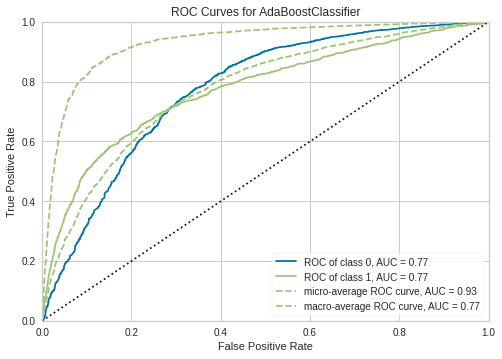

In [16]:
clf.plot_model(models[0], plot='auc')

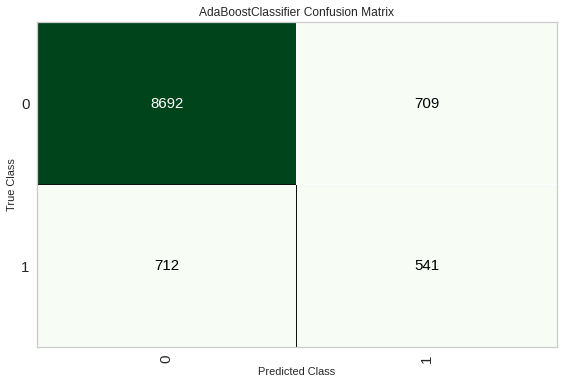

In [17]:
clf.plot_model(models[0], plot='confusion_matrix')

In [21]:
# Deriving additional meaning from the ada-boost (AB) classifier's confusion matrix
# T = True, F = False, P = Positive, N = Negative
# TN | FP
# FN | TP

TN, FP = 8692, 709
FN, TP = 712, 541

ACC = (TN + TP) / (TN + FP + FN + TP)
PRECISION = TP/(TP + FP)
F1 = 2 * (ACC * PRECISION) / (ACC + PRECISION)

print(f'Plain AB model ACC: {ACC:.5f} PRECISION: {PRECISION:.5f} F1: {F1:.5f}')

Plain AB model ACC: 0.86662 PRECISION: 0.43280 F1: 0.57729


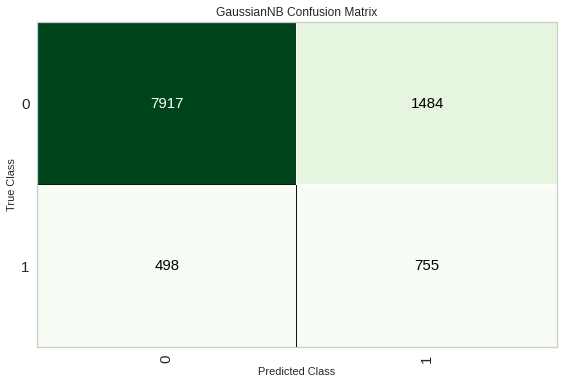

In [22]:
clf.plot_model(models[1], plot='confusion_matrix')

In [23]:
# Deriving additional meaning from the GaussianNB classifier's confusion matrix
# T = True, F = False, P = Positive, N = Negative
# TN | FP
# FN | TP

TN, FP = 7917, 1484
FN, TP = 498, 755

ACC = (TN + TP) / (TN + FP + FN + TP)
PRECISION = TP/(TP + FP)
F1 = 2 * (ACC * PRECISION) / (ACC + PRECISION)

print(f'Plain GaussianNB model ACC: {ACC:.5f} PRECISION: {PRECISION:.5f} F1: {F1:.5f}')

Plain GaussianNB model ACC: 0.81397 PRECISION: 0.33720 F1: 0.47686


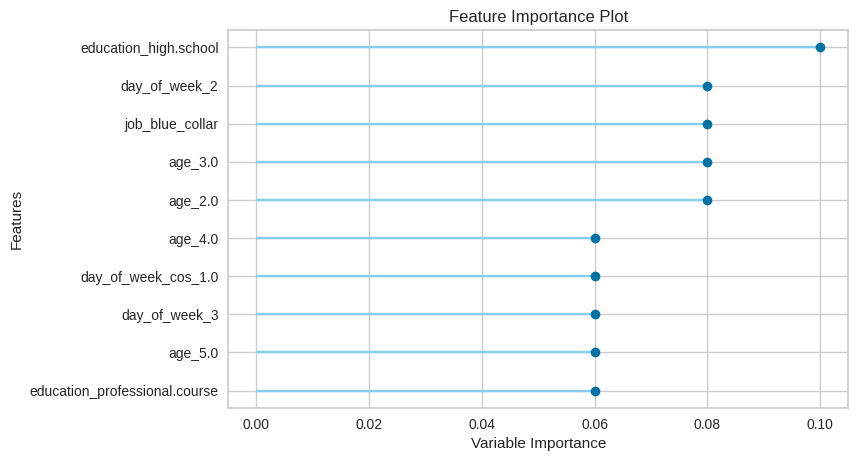

In [24]:
clf.plot_model(models[0], plot='feature')

## Obtaining predictions

### Predictions from the AB model

In [25]:
pred_holdout_pyc_plain_ab_reduced_feats = clf.predict_model(models[0])
final_pyc_plain_ab_reduced_feats = clf.finalize_model(models[0])
pred_unseen_pyc_plain_ab_reduced_feats = clf.predict_model(final_pyc_plain_ab_reduced_feats, data=test_v2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.8666,0.7732,0.4318,0.4328,0.4323,0.3567,0.3567


Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations


### Predictions from the GaussianNB model

In [26]:
pred_holdout_pyc_plain_nb_reduced_feats = clf.predict_model(models[1])
final_pyc_plain_nb_reduced_feats = clf.finalize_model(models[1])
pred_unseen_pyc_plain_nb_reduced_feats = clf.predict_model(final_pyc_plain_nb_reduced_feats, data=test_v2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.814,0.7658,0.6026,0.3372,0.4324,0.3316,0.3516


Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations


## Calculating prediction metrics

### GaussianNB metrics

In [27]:
from pycaret.utils import check_metric

print('Plain GaussianNB')
print('Accuracy: ', check_metric(pred_unseen_pyc_plain_nb_reduced_feats.bought,\
                                 pred_unseen_pyc_plain_nb_reduced_feats.Label, 'Accuracy'))
print('F1: ', check_metric(pred_unseen_pyc_plain_nb_reduced_feats.bought,\
                                 pred_unseen_pyc_plain_nb_reduced_feats.Label, 'F1'))
print('Recall: ', check_metric(pred_unseen_pyc_plain_nb_reduced_feats.bought,\
                                 pred_unseen_pyc_plain_nb_reduced_feats.Label, 'Recall'))
print('AUC: ', check_metric(pred_unseen_pyc_plain_nb_reduced_feats.bought,\
                                 pred_unseen_pyc_plain_nb_reduced_feats.Label, 'AUC'))

Plain GaussianNB
Accuracy:  0.8262
F1:  0.4377
Recall:  0.5754
AUC:  0.7175


### AB metrics

In [28]:
print('Plain AB')
print('Accuracy: ', check_metric(pred_unseen_pyc_plain_ab_reduced_feats.bought,\
                                 pred_unseen_pyc_plain_ab_reduced_feats.Label, 'Accuracy'))
print('F1: ', check_metric(pred_unseen_pyc_plain_ab_reduced_feats.bought,\
                                 pred_unseen_pyc_plain_ab_reduced_feats.Label, 'F1'))
print('Recall: ', check_metric(pred_unseen_pyc_plain_ab_reduced_feats.bought,\
                                 pred_unseen_pyc_plain_ab_reduced_feats.Label, 'Recall'))
print('AUC: ', check_metric(pred_unseen_pyc_plain_ab_reduced_feats.bought,\
                                 pred_unseen_pyc_plain_ab_reduced_feats.Label, 'AUC'))

Plain AB
Accuracy:  0.8804
F1:  0.4847
Recall:  0.4784
AUC:  0.7062


## Saving the finalized AB model

In [31]:
model_save_path = '/content/drive/MyDrive/ml/20201015-marketing-subs/models/'
clf.save_model(final_pyc_plain_ab_reduced_feats, model_save_path + 'final_pyc_plain_ab_reduced_feats')

Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations
Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='bought',
                                       time_features=[])),
                 ('imputer',
                  Iterative_Imputer(add_indicator=False,
                                    classifier=LGBMClassifier(boosting_type='gbdt',
                                                              class_weight=None,
                                                              colsample_bytree...
                                        threshold=0.95)),
                 ('dfs',
                  DFS_Classic(interactions=['multiply', 'divide'],
                              ml_usecase='classification', rand